In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.onnx
import torchvision.models as models

from sklearn.model_selection import train_test_split
from src.NvidiaCnn import NvidiaCnn
from src.WesternAustraliaCnn import NvidiaCnnByWesternAustralia
from src.Cnn import CNN
from src.Cnn_2 import CNN_2
from src.train import run_training
from src.data import get_images_annotations, RobotDataset
from src.model_utils import export_onnx, plot_loss

### Load & preprocess the data

In [2]:
DATA_PATH = "./dataset"
images_annotations = get_images_annotations(DATA_PATH)

In [3]:
train_dataset, val_dataset = train_test_split(images_annotations, test_size=0.2, random_state=42)
train_data = RobotDataset(train_dataset, augment=True)
val_data = RobotDataset(val_dataset, augment=False)

In [4]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

### NVIDIA CNN

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [18]:
model = NvidiaCnn()
optimizer = optim.Adam(model.parameters(), lr=10e-5)
criterion = nn.MSELoss()
epochs = 100

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

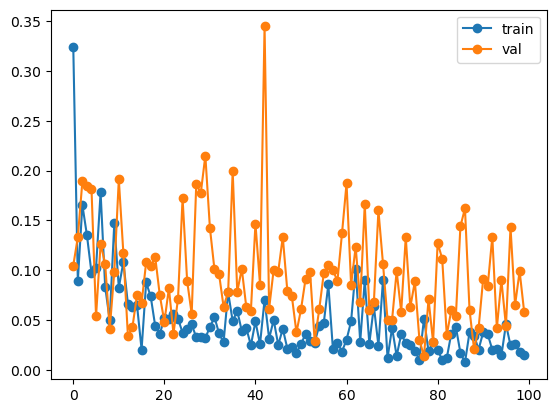

In [20]:
plot_loss(epochs, train_history, val_history)

### Export to onnx

In [21]:
export_onnx(model, "model_100_.onnx", device)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## MobileNet_V2

In [ ]:
model = models.mobilenet_v2(pretrained=True).to(device)
print(model.classifier)

model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=2)
print(model.classifier)

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plot_loss(epochs, train_history, val_history)

In [ ]:
export_onnx(model, "mobilenet.onnx", device)

### Train Model #2

In [ ]:
model = NvidiaCnnByWesternAustralia()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plot_loss(epochs, train_history, val_history)

### Train Model #3

In [6]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 50

In [7]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 50 epochs.


  0%|          | 0/190 [00:00<?, ?it/s]/home/zuzg/anaconda3/envs/nlp/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Epoch 0: 100%|██████████| 190/190 [00:32<00:00,  5.90it/s, loss=0.248]


Validation loss=0.18322784802641842


Epoch 1: 100%|██████████| 190/190 [00:30<00:00,  6.19it/s, loss=0.216]


Validation loss=0.12333776078379848


Epoch 2: 100%|██████████| 190/190 [00:30<00:00,  6.25it/s, loss=0.241]


Validation loss=0.1689053326712573


Epoch 3: 100%|██████████| 190/190 [00:31<00:00,  6.08it/s, loss=0.242]


Validation loss=0.13638167839249649


Epoch 4: 100%|██████████| 190/190 [00:30<00:00,  6.27it/s, loss=0.171]


Validation loss=0.306323407590117


Epoch 5: 100%|██████████| 190/190 [00:30<00:00,  6.33it/s, loss=0.334]


Validation loss=0.035436361019366834


Epoch 6: 100%|██████████| 190/190 [00:30<00:00,  6.20it/s, loss=0.244]


Validation loss=0.16510243842357566


Epoch 7: 100%|██████████| 190/190 [00:29<00:00,  6.36it/s, loss=0.206]


Validation loss=0.2110668687730051


Epoch 8: 100%|██████████| 190/190 [00:31<00:00,  6.08it/s, loss=0.296]


Validation loss=0.24146010535386198


Epoch 9: 100%|██████████| 190/190 [00:30<00:00,  6.18it/s, loss=0.267]


Validation loss=0.1589972543431459


Epoch 10: 100%|██████████| 190/190 [00:30<00:00,  6.29it/s, loss=0.17] 


Validation loss=0.1578024471634424


Epoch 11: 100%|██████████| 190/190 [00:30<00:00,  6.14it/s, loss=0.137]


Validation loss=0.24178747203667764


Epoch 12: 100%|██████████| 190/190 [00:30<00:00,  6.19it/s, loss=0.189]


Validation loss=0.24169816993793042


Epoch 13: 100%|██████████| 190/190 [00:30<00:00,  6.33it/s, loss=0.19] 


Validation loss=0.3088741185340755


Epoch 14: 100%|██████████| 190/190 [00:30<00:00,  6.14it/s, loss=0.0945]


Validation loss=0.08923610114374803


Epoch 15: 100%|██████████| 190/190 [00:29<00:00,  6.34it/s, loss=0.146]


Validation loss=0.24029398754225248


Epoch 16: 100%|██████████| 190/190 [00:30<00:00,  6.30it/s, loss=0.268]


Validation loss=0.5380613980938361


Epoch 17: 100%|██████████| 190/190 [00:30<00:00,  6.17it/s, loss=0.261]


Validation loss=0.35793182534082735


Epoch 18: 100%|██████████| 190/190 [00:30<00:00,  6.29it/s, loss=0.259]


Validation loss=0.2985377706624433


Epoch 19: 100%|██████████| 190/190 [00:31<00:00,  6.07it/s, loss=0.326]


Validation loss=0.23612581839733224


Epoch 20: 100%|██████████| 190/190 [00:30<00:00,  6.20it/s, loss=0.22]  


Validation loss=0.14191686771462853


Epoch 21: 100%|██████████| 190/190 [00:29<00:00,  6.36it/s, loss=0.155]


Validation loss=0.16119054023798074


Epoch 22: 100%|██████████| 190/190 [00:31<00:00,  6.07it/s, loss=0.245]


Validation loss=0.2501183079321471


Epoch 23: 100%|██████████| 190/190 [00:30<00:00,  6.21it/s, loss=0.169]


Validation loss=0.23128948537579636


Epoch 24: 100%|██████████| 190/190 [00:30<00:00,  6.31it/s, loss=0.291]


Validation loss=0.052988140292701734


Epoch 25: 100%|██████████| 190/190 [00:30<00:00,  6.17it/s, loss=0.324]


Validation loss=0.17797268121090923


Epoch 26: 100%|██████████| 190/190 [00:30<00:00,  6.26it/s, loss=0.233]


Validation loss=0.27442747351670443


Epoch 27: 100%|██████████| 190/190 [00:30<00:00,  6.25it/s, loss=0.28] 


Validation loss=0.1399839370351827


Epoch 28: 100%|██████████| 190/190 [00:31<00:00,  5.98it/s, loss=0.17] 


Validation loss=0.2335662280379246


Epoch 29: 100%|██████████| 190/190 [00:30<00:00,  6.29it/s, loss=0.223]


Validation loss=0.13516754932611655


Epoch 30: 100%|██████████| 190/190 [00:31<00:00,  6.08it/s, loss=0.171]


Validation loss=0.1994385512002662


Epoch 31: 100%|██████████| 190/190 [00:30<00:00,  6.26it/s, loss=0.218]


Validation loss=0.1601121328543498


Epoch 32: 100%|██████████| 190/190 [00:30<00:00,  6.29it/s, loss=0.364]


Validation loss=0.21146500985293173


Epoch 33: 100%|██████████| 190/190 [00:31<00:00,  6.07it/s, loss=0.186]


Validation loss=0.4051182377373652


Epoch 34: 100%|██████████| 190/190 [00:30<00:00,  6.17it/s, loss=0.201]


Validation loss=0.20464666249136595


Epoch 35: 100%|██████████| 190/190 [00:30<00:00,  6.32it/s, loss=0.264]


Validation loss=0.12051173654199711


Epoch 36: 100%|██████████| 190/190 [00:31<00:00,  6.10it/s, loss=0.138]


Validation loss=0.1585013927016478


Epoch 37: 100%|██████████| 190/190 [00:30<00:00,  6.31it/s, loss=0.263]


Validation loss=0.12404190378172908


Epoch 38: 100%|██████████| 190/190 [00:29<00:00,  6.34it/s, loss=0.232]


Validation loss=0.2554123242963249


Epoch 39: 100%|██████████| 190/190 [00:30<00:00,  6.16it/s, loss=0.247]


Validation loss=0.20106072180060428


Epoch 40: 100%|██████████| 190/190 [00:30<00:00,  6.33it/s, loss=0.162]


Validation loss=0.163945516554462


Epoch 41: 100%|██████████| 190/190 [00:30<00:00,  6.15it/s, loss=0.296] 


Validation loss=0.20243128925959283


Epoch 42: 100%|██████████| 190/190 [00:30<00:00,  6.23it/s, loss=0.309]


Validation loss=0.16579870440274988


Epoch 43: 100%|██████████| 190/190 [00:30<00:00,  6.30it/s, loss=0.255]


Validation loss=0.21585208795959546


Epoch 44: 100%|██████████| 190/190 [00:30<00:00,  6.16it/s, loss=0.272]


Validation loss=0.18470105189400465


Epoch 45: 100%|██████████| 190/190 [00:30<00:00,  6.21it/s, loss=0.153]


Validation loss=0.248198763733688


Epoch 46: 100%|██████████| 190/190 [00:30<00:00,  6.15it/s, loss=0.193]


Validation loss=0.04335029655949217


Epoch 47: 100%|██████████| 190/190 [00:29<00:00,  6.35it/s, loss=0.17] 


Validation loss=0.172134954257529


Epoch 48: 100%|██████████| 190/190 [00:31<00:00,  6.04it/s, loss=0.241]


Validation loss=0.11967953714324522


Epoch 49: 100%|██████████| 190/190 [00:30<00:00,  6.15it/s, loss=0.255]


Validation loss=0.21146518615031576


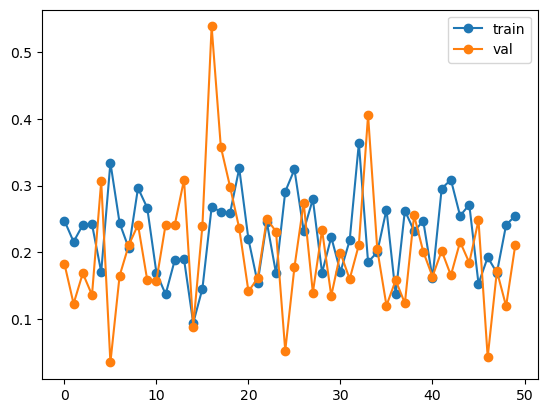

In [8]:
plot_loss(epochs, train_history, val_history)

In [9]:
export_onnx(model, "model_cnn_1.onnx", device)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### Train Model #4

In [10]:
model = CNN_2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 50

In [11]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 50 epochs.


Epoch 0: 100%|██████████| 190/190 [00:36<00:00,  5.14it/s, loss=0.218]


Validation loss=0.15208472695443007


Epoch 1: 100%|██████████| 190/190 [00:36<00:00,  5.15it/s, loss=0.271]


Validation loss=0.2392382449917487


Epoch 2: 100%|██████████| 190/190 [00:36<00:00,  5.14it/s, loss=0.263]


Validation loss=0.25929894232030914


Epoch 3: 100%|██████████| 190/190 [00:36<00:00,  5.17it/s, loss=0.159]


Validation loss=0.23062315623918614


Epoch 4: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.219]


Validation loss=0.26820586198080254


Epoch 5: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.296]


Validation loss=0.2662399651174829


Epoch 6: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.293]


Validation loss=0.09920907707429406


Epoch 7: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.223]


Validation loss=0.20199800966885836


Epoch 8: 100%|██████████| 190/190 [00:36<00:00,  5.20it/s, loss=0.198]


Validation loss=0.1540503852136547


Epoch 9: 100%|██████████| 190/190 [00:36<00:00,  5.20it/s, loss=0.3]  


Validation loss=0.22732968831008016


Epoch 10: 100%|██████████| 190/190 [00:36<00:00,  5.21it/s, loss=0.274]


Validation loss=0.11444122110458248


Epoch 11: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.262]


Validation loss=0.19938812455189167


Epoch 12: 100%|██████████| 190/190 [00:36<00:00,  5.14it/s, loss=0.263]


Validation loss=0.12138818585740152


Epoch 13: 100%|██████████| 190/190 [00:37<00:00,  5.13it/s, loss=0.267]


Validation loss=0.3224446710130873


Epoch 14: 100%|██████████| 190/190 [00:36<00:00,  5.14it/s, loss=0.196]


Validation loss=0.21789260246165915


Epoch 15: 100%|██████████| 190/190 [00:36<00:00,  5.17it/s, loss=0.15] 


Validation loss=0.2445643846641615


Epoch 16: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.206]


Validation loss=0.15163196089204867


Epoch 17: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.209]


Validation loss=0.27278654944215336


Epoch 18: 100%|██████████| 190/190 [00:36<00:00,  5.17it/s, loss=0.284]


Validation loss=0.16757534439945512


Epoch 19: 100%|██████████| 190/190 [00:36<00:00,  5.18it/s, loss=0.211]


Validation loss=0.2325013454920261


Epoch 20: 100%|██████████| 190/190 [00:37<00:00,  5.13it/s, loss=0.308] 


Validation loss=0.2742454634699049


Epoch 21: 100%|██████████| 190/190 [00:37<00:00,  5.10it/s, loss=0.143] 


Validation loss=0.2549963977746609


Epoch 22: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.268]


Validation loss=0.23489691272144234


Epoch 23: 100%|██████████| 190/190 [00:37<00:00,  5.13it/s, loss=0.194]


Validation loss=0.20567024467803885


Epoch 24: 100%|██████████| 190/190 [00:37<00:00,  5.07it/s, loss=0.227]


Validation loss=0.3071032899356655


Epoch 25: 100%|██████████| 190/190 [00:37<00:00,  5.12it/s, loss=0.247]


Validation loss=0.1570165835614755


Epoch 26: 100%|██████████| 190/190 [00:37<00:00,  5.07it/s, loss=0.208]


Validation loss=0.19822140571428631


Epoch 27: 100%|██████████| 190/190 [00:37<00:00,  5.07it/s, loss=0.319]


Validation loss=0.21285072307437142


Epoch 28: 100%|██████████| 190/190 [00:37<00:00,  5.09it/s, loss=0.186]


Validation loss=0.17276887253711173


Epoch 29: 100%|██████████| 190/190 [00:37<00:00,  5.07it/s, loss=0.2]  


Validation loss=0.09154502100258391


Epoch 30: 100%|██████████| 190/190 [00:37<00:00,  5.00it/s, loss=0.26] 


Validation loss=0.2602304813547978


Epoch 31: 100%|██████████| 190/190 [00:37<00:00,  5.11it/s, loss=0.304]


Validation loss=0.18192346432282488


Epoch 32: 100%|██████████| 190/190 [00:37<00:00,  5.10it/s, loss=0.137]


Validation loss=0.1684295520033232


Epoch 33: 100%|██████████| 190/190 [00:37<00:00,  5.09it/s, loss=0.217]


Validation loss=0.1950415117257981


Epoch 34: 100%|██████████| 190/190 [00:37<00:00,  5.12it/s, loss=0.247]


Validation loss=0.08916010394933215


Epoch 35: 100%|██████████| 190/190 [00:36<00:00,  5.17it/s, loss=0.221]


Validation loss=0.1285394124667173


Epoch 36: 100%|██████████| 190/190 [00:36<00:00,  5.20it/s, loss=0.208]


Validation loss=0.20102878887361234


Epoch 37: 100%|██████████| 190/190 [00:36<00:00,  5.15it/s, loss=0.246]


Validation loss=0.16928393534814198


Epoch 38: 100%|██████████| 190/190 [00:37<00:00,  5.12it/s, loss=0.316]


Validation loss=0.24931720981705416


Epoch 39: 100%|██████████| 190/190 [00:36<00:00,  5.21it/s, loss=0.233]


Validation loss=0.15195114523791586


Epoch 40: 100%|██████████| 190/190 [00:36<00:00,  5.19it/s, loss=0.273]


Validation loss=0.2402098111473543


Epoch 41: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.188] 


Validation loss=0.19815994647249258


Epoch 42: 100%|██████████| 190/190 [00:36<00:00,  5.18it/s, loss=0.193]


Validation loss=0.24258441595982552


Epoch 43: 100%|██████████| 190/190 [00:36<00:00,  5.17it/s, loss=0.221]


Validation loss=0.15360445525914684


Epoch 44: 100%|██████████| 190/190 [00:36<00:00,  5.18it/s, loss=0.216]


Validation loss=0.08858714762859692


Epoch 45: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.3]   


Validation loss=0.1626052748828522


Epoch 46: 100%|██████████| 190/190 [00:37<00:00,  5.13it/s, loss=0.244]


Validation loss=0.19736931059767118


Epoch 47: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.134]


Validation loss=0.12168870701801392


Epoch 48: 100%|██████████| 190/190 [00:36<00:00,  5.16it/s, loss=0.241]


Validation loss=0.14835764846040383


Epoch 49: 100%|██████████| 190/190 [00:36<00:00,  5.15it/s, loss=0.2]  


Validation loss=0.3018692888950022


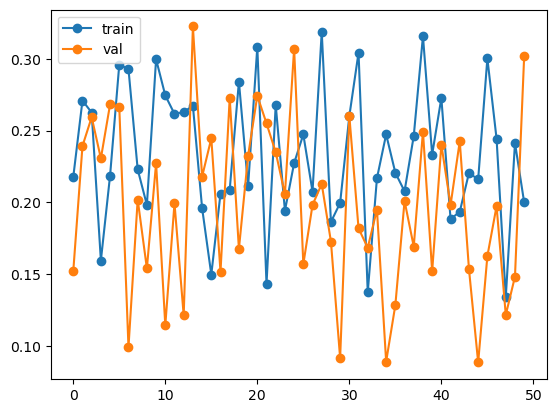

In [14]:
plot_loss(epochs, train_history, val_history)

In [15]:
export_onnx(model, "model_cnn_2.onnx", device)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

